In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
url = "https://raw.githubusercontent.com/neilaxu/schulich_data_science/main/DS2/Final%20Project/Final%20Project%20Dataset.csv"
df = pd.read_csv(url)

df.head()

,ID,Age,Gender,Marital Status,Occupation,Income Level,Education Level,Policy Type,Credit Score,Driving Record Score,...,Daily Active Calories (kcal),Daily Exercise (min),Daily Steps,Stand Hours,Workout Duration (min),Resting Heart Rate Index,Sleep Quality Index,Blood Oxygen Level,Blood Pressure Index,Cardio Fitness Level
0,1,70,Male,Divorced,Nurse,25626,1,Business,495,5,...,529,53,6665,6,41,2,3,92,2,1
1,2,70,Male,Married,Manager,126902,3,Family,439,4,...,755,81,6744,8,0,3,2,98,2,3
2,3,70,Male,Widowed,Teacher,47786,2,Group,407,2,...,508,52,3631,5,8,1,2,93,1,2
3,4,70,Female,Divorced,Entrepreneur,64274,1,Individual,662,3,...,758,82,8570,2,64,1,3,96,1,3
4,5,70,Male,Married,Salesperson,125574,5,Group,595,4,...,471,38,3494,0,0,3,3,97,2,1


In [5]:
df.columns

Index(['ID', 'Age', 'Gender', 'Marital Status', 'Occupation', 'Income Level',
       'Education Level', 'Policy Type', 'Credit Score',
       'Driving Record Score', 'RACLV', 'Daily Active Calories (kcal)',
       'Daily Exercise (min)', 'Daily Steps', 'Stand Hours',
       'Workout Duration (min)', 'Resting Heart Rate Index',
       'Sleep Quality Index', 'Blood Oxygen Level', 'Blood Pressure Index',
       'Cardio Fitness Level'],
      dtype='object')

In [6]:
#output y create based on RACLV

def categorize_raclv(df):
    # Calculate mean RACLV
    mean_raclv = df['RACLV'].mean()

    # Create conditions for categorization
    conditions = [
        (df['RACLV'] > mean_raclv),
        (df['RACLV'] == 0),
        (df['RACLV'].between(0, mean_raclv))
    ]

    # Create category labels
    categories = ['High', 'Low', 'Medium']

    # Create new column with categories
    df['RACLV_Category'] = np.select(conditions, categories, default='Medium')

    return df

# Add required import
import numpy as np

# Apply categorization
df = categorize_raclv(df)

target_map = {'High': 2, 'Medium': 1, 'Low': 0}
df['RACLV_Category'] = df['RACLV_Category'].map(target_map)

EDA

In [7]:
numerical_features = ['Age', 'Income Level', 'Education Level', 'Credit Score',
                     'Driving Record Score', 'Daily Active Calories (kcal)',
                     'Daily Exercise (min)', 'Daily Steps', 'Stand Hours',
                     'Workout Duration (min)', 'Resting Heart Rate Index',
                     'Sleep Quality Index', 'Blood Oxygen Level',
                     'Blood Pressure Index', 'Cardio Fitness Level']

categorical_features = ['Gender', 'Occupation', 'Policy Type']

In [8]:
# 1. Basic statistics for numerical features
print("Summary Statistics for Numerical Features:")
df[numerical_features].describe()

Summary Statistics for Numerical Features:


,Age,Income Level,Education Level,Credit Score,Driving Record Score,Daily Active Calories (kcal),Daily Exercise (min),Daily Steps,Stand Hours,Workout Duration (min),Resting Heart Rate Index,Sleep Quality Index,Blood Oxygen Level,Blood Pressure Index,Cardio Fitness Level
count,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000
mean,44.333383,86570.914827,3.002710,671.597163,3.131395,596.649907,62.159430,5984.290731,4.306544,26.092593,2.236080,3.340691,95.515934,1.814347,2.319477
std,15.112671,38022.101857,1.449553,105.961153,1.491696,250.603574,26.256405,2729.204832,2.800566,23.028844,0.703504,1.277502,2.289854,0.735811,0.884895
min,18.000000,10574.000000,1.000000,400.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,92.000000,1.000000,1.000000
25%,32.000000,54478.500000,2.000000,585.000000,2.000000,424.000000,44.000000,4026.000000,2.000000,6.000000,2.000000,2.000000,94.000000,1.000000,1.000000
50%,43.000000,84961.000000,3.000000,667.000000,3.000000,614.000000,64.000000,6142.000000,4.000000,21.000000,2.000000,3.000000,96.000000,2.000000,3.000000
75%,57.000000,118473.500000,4.000000,755.000000,5.000000,805.000000,83.000000,8076.000000,7.000000,41.000000,3.000000,4.000000,98.000000,2.000000,3.000000
max,86.000000,169999.000000,5.000000,900.000000,5.000000,1000.000000,115.000000,11986.000000,10.000000,106.000000,3.000000,5.000000,99.000000,4.000000,3.000000


In [9]:
# 2. Correlation analysis with RACLV
numerical_with_raclv = numerical_features + ['RACLV']
correlation_matrix = df[numerical_with_raclv].corr()['RACLV'].sort_values(ascending=False)
print("\nCorrelation with RACLV:")
print(correlation_matrix)


Correlation with RACLV:
RACLV                           1.000000
Daily Exercise (min)            0.242407
Daily Active Calories (kcal)    0.238249
Credit Score                    0.221962
Daily Steps                     0.214768
Cardio Fitness Level            0.212290
Income Level                    0.204338
Resting Heart Rate Index        0.154003
Workout Duration (min)          0.142413
Sleep Quality Index             0.117305
Stand Hours                     0.109487
Blood Pressure Index            0.090631
Driving Record Score            0.032963
Blood Oxygen Level              0.001600
Education Level                -0.002074
Age                            -0.249418
Name: RACLV, dtype: float64


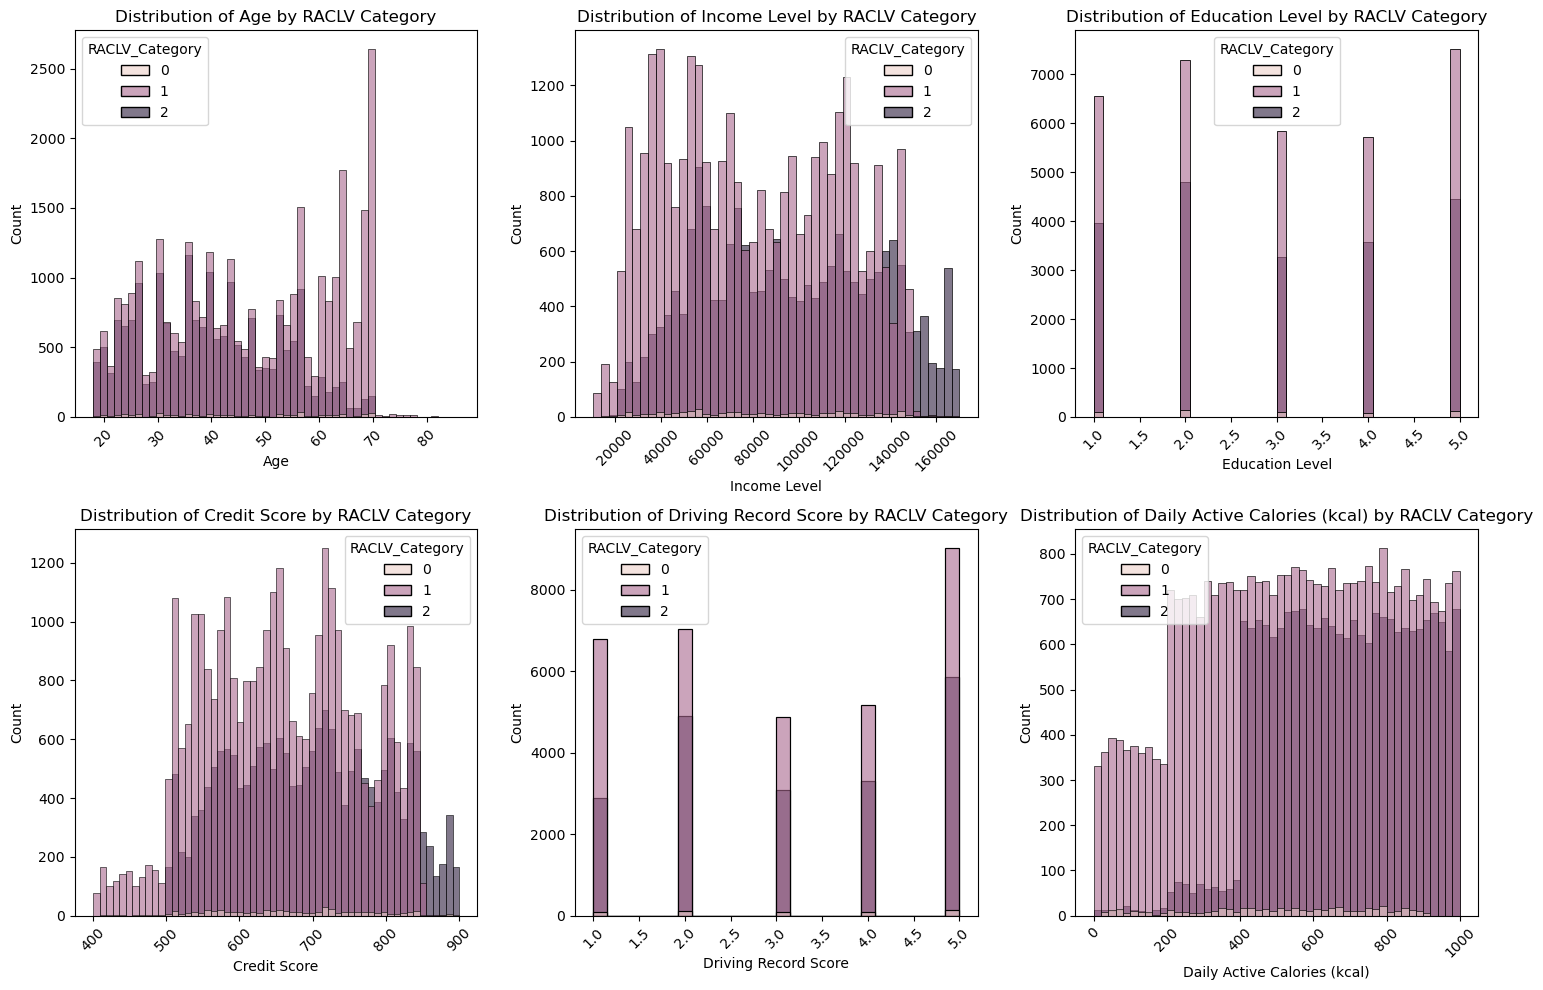

In [10]:
# 3. Distribution plots for key numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features[:6], 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=feature, hue='RACLV_Category', alpha=0.6)
    plt.title(f'Distribution of {feature} by RACLV Category')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

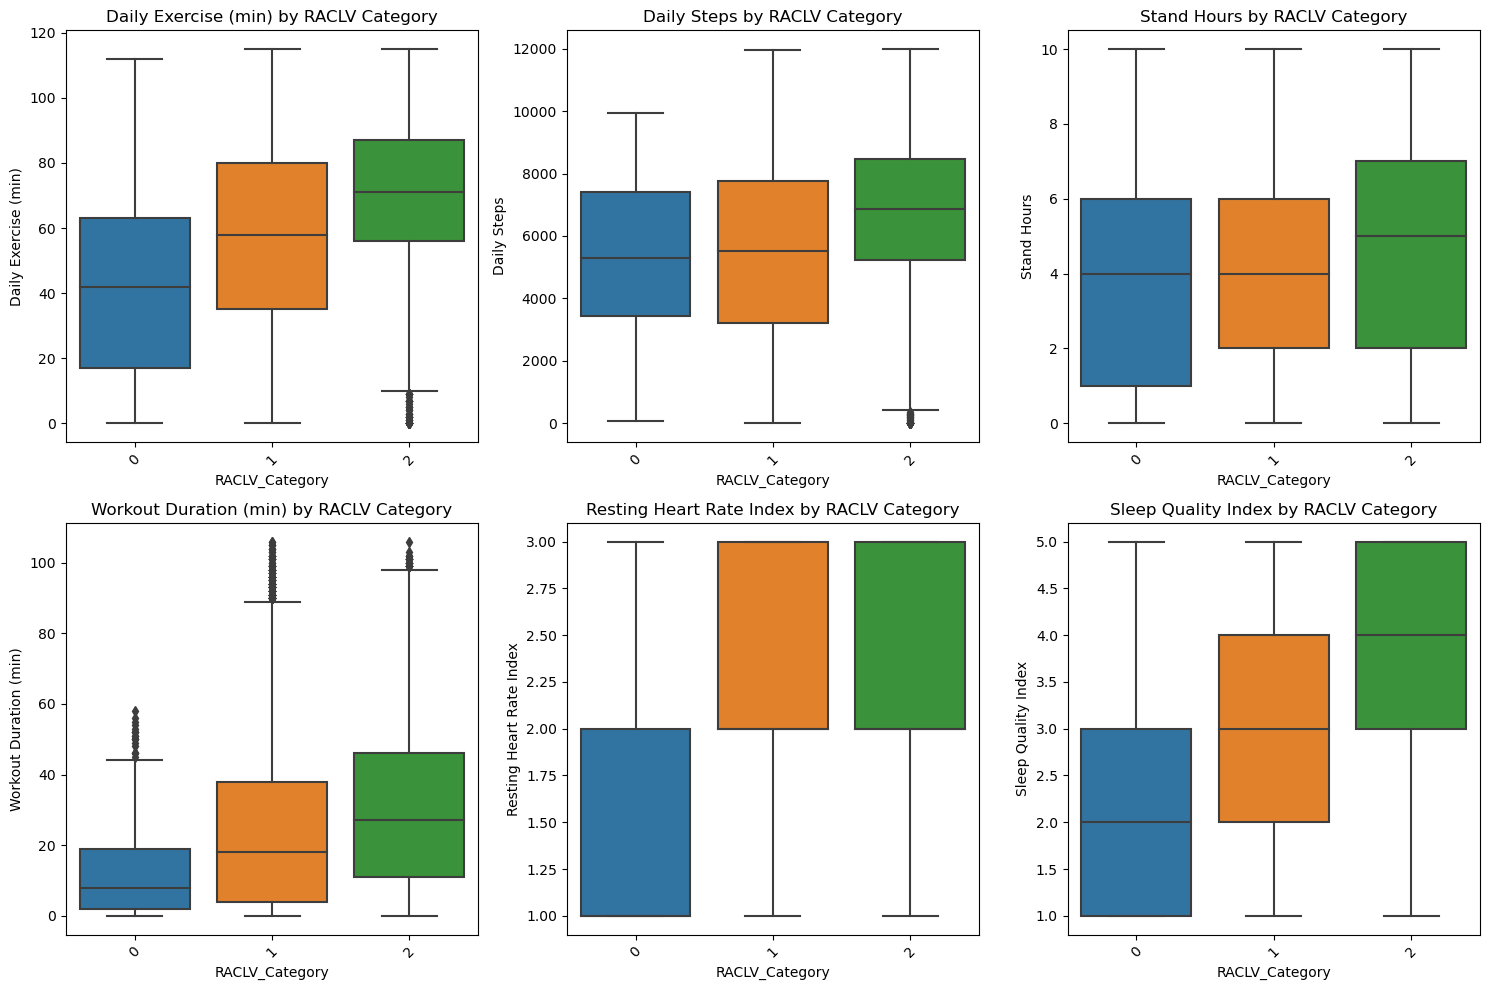

In [11]:
# 4. Box plots for remaining numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features[6:12], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='RACLV_Category', y=feature)
    plt.title(f'{feature} by RACLV Category')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

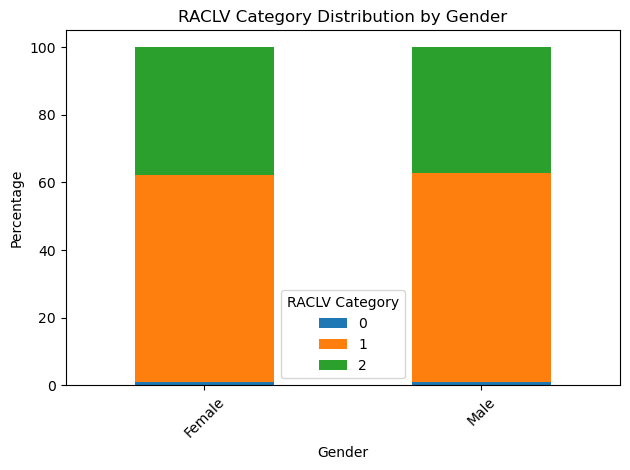

<Figure size 1000x600 with 0 Axes>

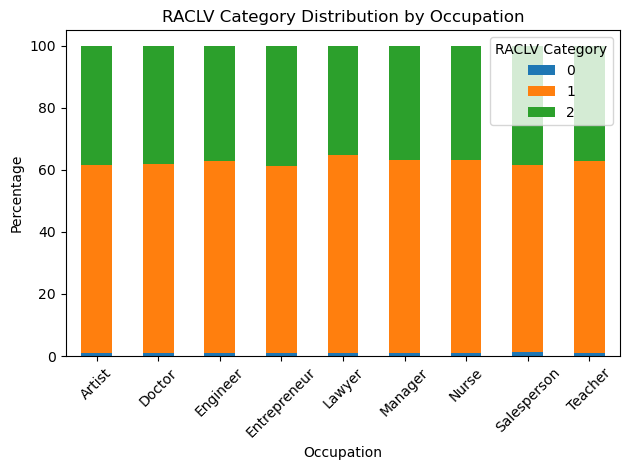

<Figure size 1000x600 with 0 Axes>

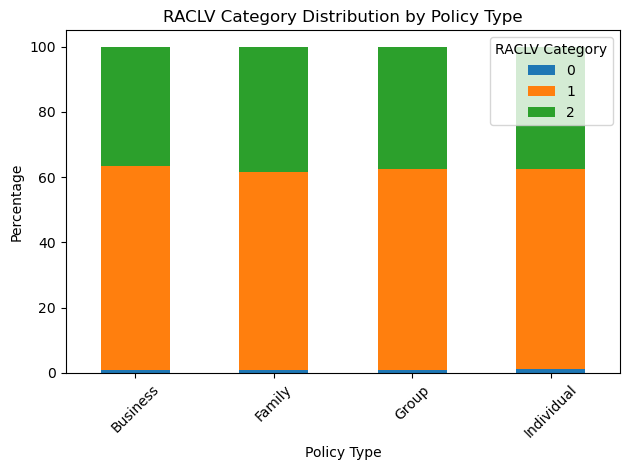

In [12]:
# 5. Categorical features analysis
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    cross_tab = pd.crosstab(df[feature], df['RACLV_Category'], normalize='index') * 100
    cross_tab.plot(kind='bar', stacked=True)
    plt.title(f'RACLV Category Distribution by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Percentage')
    plt.legend(title='RACLV Category')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [13]:
# 6. Statistical tests for numerical features
print("\nStatistical Tests for Numerical Features:")
for feature in numerical_features:
    f_stat, p_val = stats.f_oneway(
        df[df['RACLV_Category'] == 'Low'][feature],
        df[df['RACLV_Category'] == 'Medium'][feature],
        df[df['RACLV_Category'] == 'High'][feature]
    )
    print(f"\n{feature}:")
    print(f"F-statistic: {f_stat:.4f}")
    print(f"p-value: {p_val:.4e}")


Statistical Tests for Numerical Features:

Age:
F-statistic: nan
p-value: nan

Income Level:
F-statistic: nan
p-value: nan

Education Level:
F-statistic: nan
p-value: nan

Credit Score:
F-statistic: nan
p-value: nan

Driving Record Score:
F-statistic: nan
p-value: nan

Daily Active Calories (kcal):
F-statistic: nan
p-value: nan

Daily Exercise (min):
F-statistic: nan
p-value: nan

Daily Steps:
F-statistic: nan
p-value: nan

Stand Hours:
F-statistic: nan
p-value: nan

Workout Duration (min):
F-statistic: nan
p-value: nan

Resting Heart Rate Index:
F-statistic: nan
p-value: nan

Sleep Quality Index:
F-statistic: nan
p-value: nan

Blood Oxygen Level:
F-statistic: nan
p-value: nan

Blood Pressure Index:
F-statistic: nan
p-value: nan

Cardio Fitness Level:
F-statistic: nan
p-value: nan


c:\Users\User\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [14]:
# 7. Feature importance based on correlation absolute values
abs_corr = abs(correlation_matrix[:-1]) 
sorted_features = abs_corr.sort_values(ascending=False)
print("\nFeature Importance Based on Absolute Correlation:")
print(sorted_features)


Feature Importance Based on Absolute Correlation:
RACLV                           1.000000
Daily Exercise (min)            0.242407
Daily Active Calories (kcal)    0.238249
Credit Score                    0.221962
Daily Steps                     0.214768
Cardio Fitness Level            0.212290
Income Level                    0.204338
Resting Heart Rate Index        0.154003
Workout Duration (min)          0.142413
Sleep Quality Index             0.117305
Stand Hours                     0.109487
Blood Pressure Index            0.090631
Driving Record Score            0.032963
Education Level                 0.002074
Blood Oxygen Level              0.001600
Name: RACLV, dtype: float64


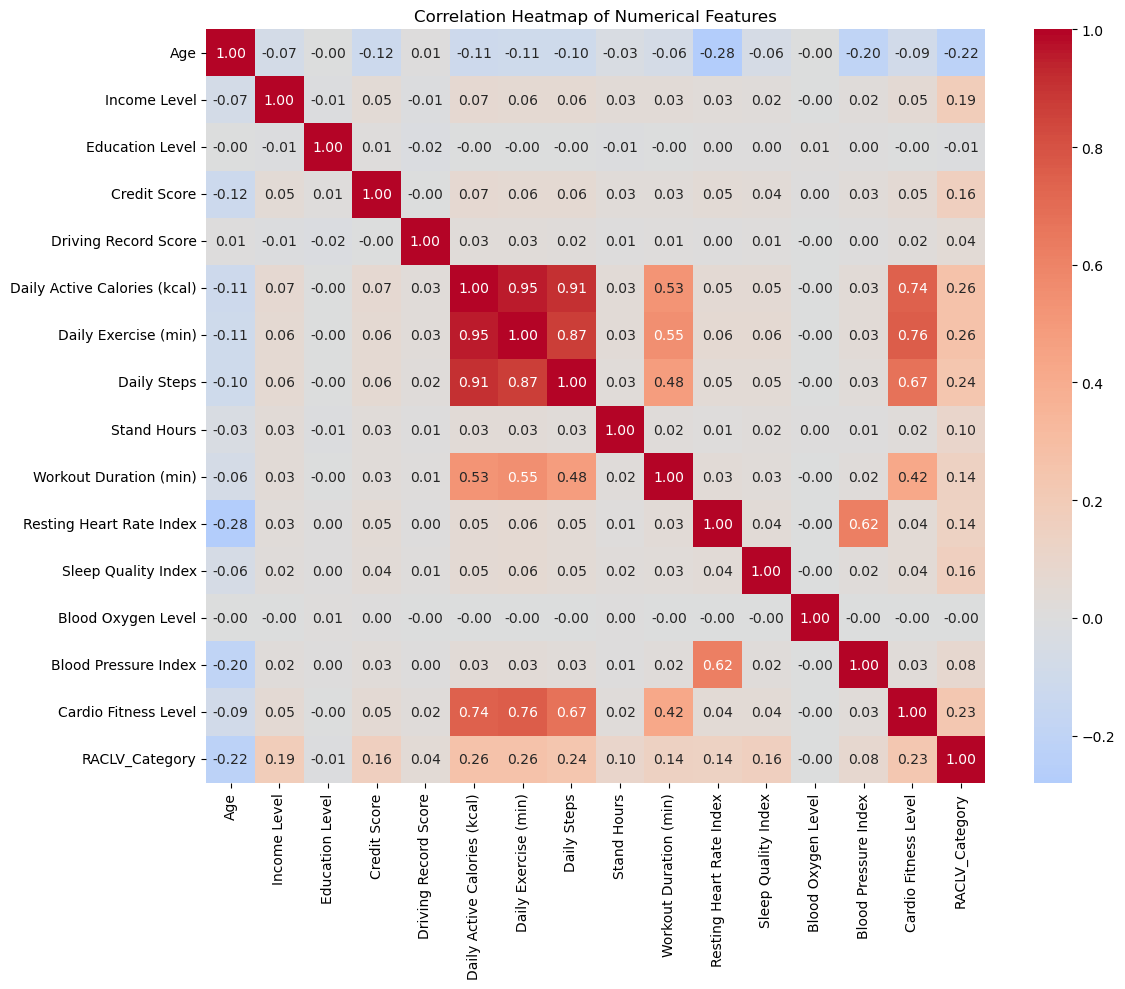

In [15]:
# 8. Check for multicollinearity among numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_features + ['RACLV_Category']].corr(),
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

In [16]:
# 9. Summary of findings
print("\nKey Findings:")
print("1. Most correlated features with RACLV (absolute values):")
for feature, corr in sorted_features[:5].items():
    print(f"   - {feature}: {corr:.4f}")

print("\n2. Features with significant differences between RACLV categories (p < 0.05):")
for feature in numerical_features:
    f_stat, p_val = stats.f_oneway(
        df[df['RACLV_Category'] == 'Low'][feature],
        df[df['RACLV_Category'] == 'Medium'][feature],
        df[df['RACLV_Category'] == 'High'][feature]
    )
    if p_val < 0.05:
        print(f"   - {feature}: p-value = {p_val:.4e}")


Key Findings:
1. Most correlated features with RACLV (absolute values):
   - RACLV: 1.0000
   - Daily Exercise (min): 0.2424
   - Daily Active Calories (kcal): 0.2382
   - Credit Score: 0.2220
   - Daily Steps: 0.2148

2. Features with significant differences between RACLV categories (p < 0.05):


c:\Users\User\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


Modeling

In [17]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [18]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [19]:
# Define feature sets
numerical_features1 = ['Age', 'Income Level', 'Education Level', 'Credit Score', 'Driving Record Score']
categorical_features1 = ['Gender', 'Marital Status', 'Occupation', 'Policy Type']

numerical_features2 = numerical_features
categorical_features2 = categorical_features

In [20]:
# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first'))])

preprocessor1 = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_features1),
    ('cat', categorical_transformer, categorical_features1)
])

preprocessor2 = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_features2),
    ('cat', categorical_transformer, categorical_features2)
])

In [21]:
# Prepare data
X1 = df[numerical_features1 + categorical_features1]
X2 = df[numerical_features2 + categorical_features2]
y = df['RACLV_Category']

# Split data
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
X2_train, X2_test, _, _ = train_test_split(X2, y, test_size=0.2, random_state=42)

# Process data
X1_train_processed = preprocessor1.fit_transform(X1_train)
X1_test_processed = preprocessor1.transform(X1_test)
X2_train_processed = preprocessor2.fit_transform(X2_train)
X2_test_processed = preprocessor2.transform(X2_test)

In [22]:
#three models for ml
# Random Forest, XGBoost, LightGBM models
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
lgbm_model = LGBMClassifier(random_state=42)


In [23]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [24]:
# Initialize a dictionary to store results
results = {
    'Model': [],
    'Dataset': [],
    'Mean F1 Score': []
}

# Perform cross-validation for X1_train_processed
print("Cross-Validation for X1_train_processed:")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

dt_scores_X1 = cross_val_score(
    dt_model, X1_train_processed, y_train, cv=cv, scoring='f1_weighted'
)
results['Model'].append('Decision Tree')
results['Dataset'].append('X1_train_processed')
results['Mean F1 Score'].append(np.mean(dt_scores_X1))

xgb_scores_X1 = cross_val_score(
    xgb_model,X1_train_processed, y_train, cv=cv, scoring='f1_weighted'
)
results['Model'].append('XGBoost')
results['Dataset'].append('X1_train_processed')
results['Mean F1 Score'].append(np.mean(xgb_scores_X1))

lgbm_scores_X1 = cross_val_score(
    lgbm_model, X1_train_processed, y_train, cv=cv, scoring='f1_weighted'
)
results['Model'].append('LightGBM')
results['Dataset'].append('X1_train_processed')
results['Mean F1 Score'].append(np.mean(lgbm_scores_X1))

# Perform cross-validation for X2_train_processed
print("\nCross-Validation for X2_train_processed:")

# Decision Tree for X2
dt_scores_X2 = cross_val_score(
    dt_model, X2_train_processed, y_train, cv=cv, scoring='f1_weighted'
)
results['Model'].append('Decision Tree')
results['Dataset'].append('X2_train_processed')
results['Mean F1 Score'].append(np.mean(dt_scores_X2))


xgb_scores_X2 = cross_val_score(
    xgb_model,X2_train_processed, y_train, cv=cv, scoring='f1_weighted'
)
results['Model'].append('XGBoost')
results['Dataset'].append('X2_train_processed')
results['Mean F1 Score'].append(np.mean(xgb_scores_X2))

lgbm_scores_X2 = cross_val_score(
    lgbm_model, X2_train_processed, y_train, cv=cv, scoring='f1_weighted'
)
results['Model'].append('LightGBM')
results['Dataset'].append('X2_train_processed')
results['Mean F1 Score'].append(np.mean(lgbm_scores_X2))

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

Cross-Validation for X1_train_processed:


  File "c:\Users\User\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 619
[LightGBM] [Info] Number of data points in the train set: 34241, number of used features: 21
[LightGBM] [Info] Start training from score -4.621096
[LightGBM] [Info] Start training from score -0.485479
[LightGBM] [Info] Start training from score -0.981482
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 619
[LightGBM] [Info] Number of data points in the train set: 34241, number of used features: 21
[LightGBM] [Info] Start training from score -4.621096
[LightGBM] [Info] Start training from score -0.485431
[LightGBM] [Info] Start tr

In [25]:
# Print the full DataFrame
print("\nCross-Validation Results Summary:")
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
print(results_df)

# Optionally export the results to a CSV file for easier access
results_df.to_csv('cross_validation_results.csv', index=False)


Cross-Validation Results Summary:
           Model             Dataset  Mean F1 Score
0  Decision Tree  X1_train_processed       0.578637
1        XGBoost  X1_train_processed       0.673053
2       LightGBM  X1_train_processed       0.673911
3  Decision Tree  X2_train_processed       0.660937
4        XGBoost  X2_train_processed       0.747867
5       LightGBM  X2_train_processed       0.749955


Evaluation

In [26]:
def adjust_predictions(y_pred_proba, target_low_ratio=0.01):
    low_probs = y_pred_proba[:, 0]
    n_samples = len(low_probs)
    n_low = int(n_samples * target_low_ratio)
    low_indices = np.argsort(low_probs)[-n_low:]
    y_pred_adjusted = np.argmax(y_pred_proba, axis=1)
    y_pred_adjusted[low_indices] = 0
    return y_pred_adjusted

def evaluate_and_plot(model, X_train, X_test, y_train, y_test, model_name, set_num):
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred = adjust_predictions(y_pred_proba)

    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1': f1_score(y_test, y_pred, average='weighted'),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    }

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix - Set {set_num}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return metrics


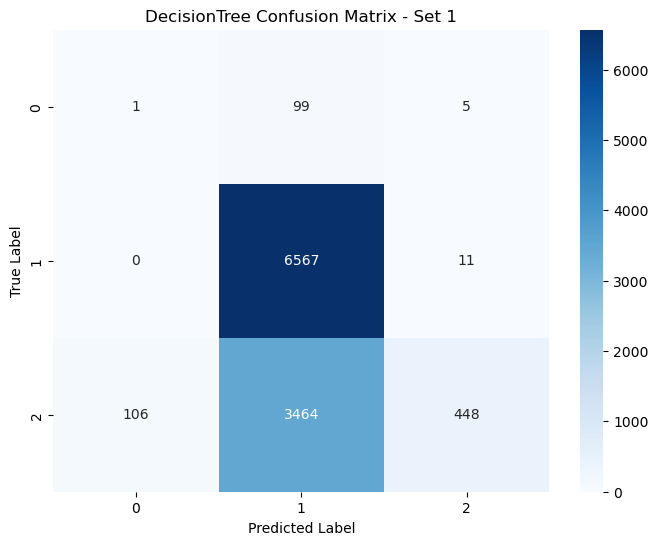

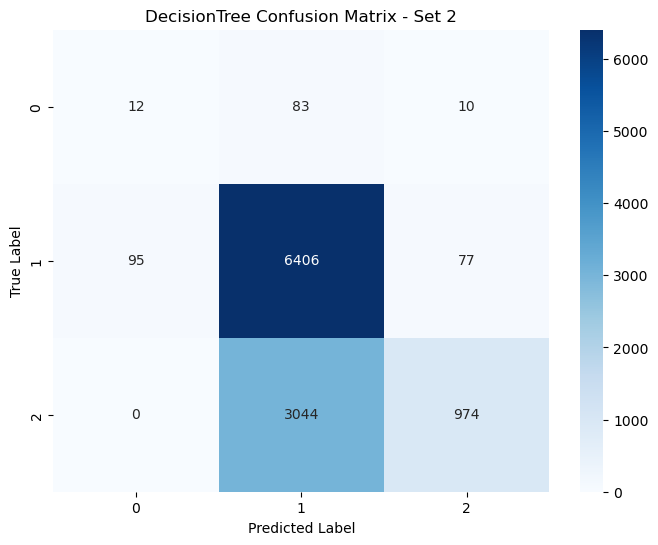

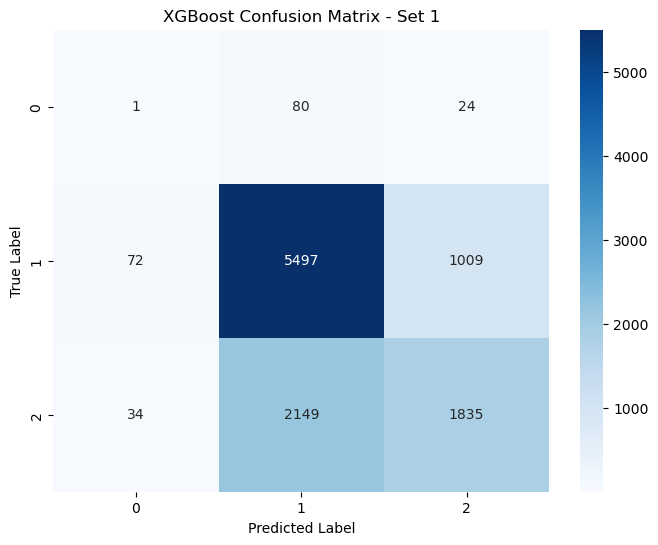

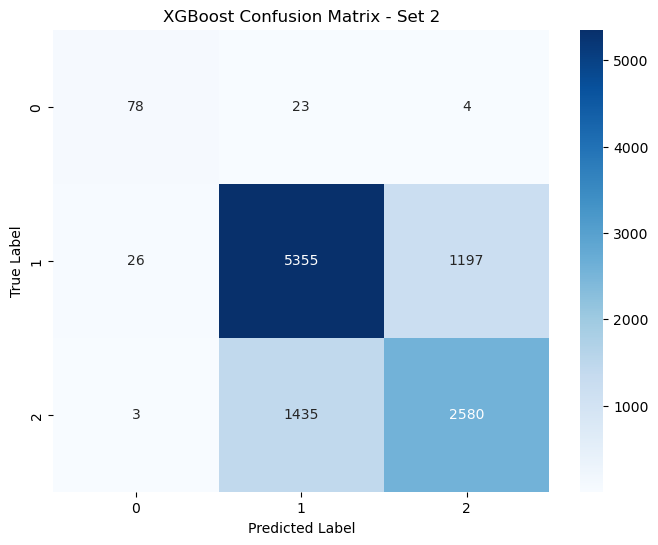

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 620
[LightGBM] [Info] Number of data points in the train set: 42802, number of used features: 21
[LightGBM] [Info] Start training from score -4.619335
[LightGBM] [Info] Start training from score -0.485458
[LightGBM] [Info] Start training from score -0.981562


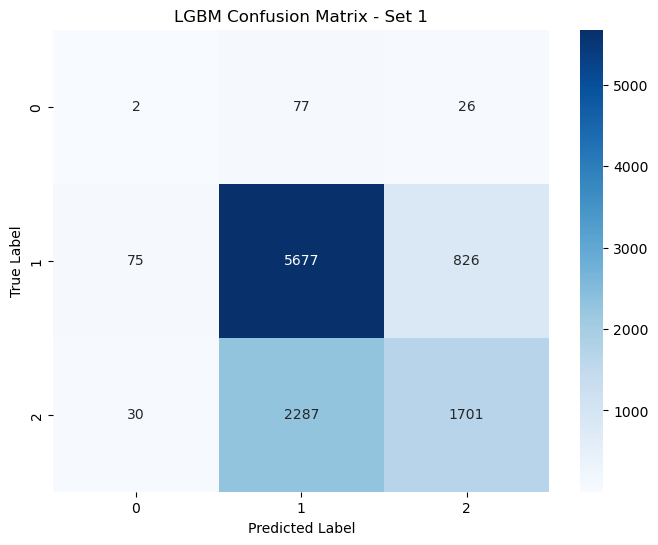

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 42802, number of used features: 27
[LightGBM] [Info] Start training from score -4.619335
[LightGBM] [Info] Start training from score -0.485458
[LightGBM] [Info] Start training from score -0.981562


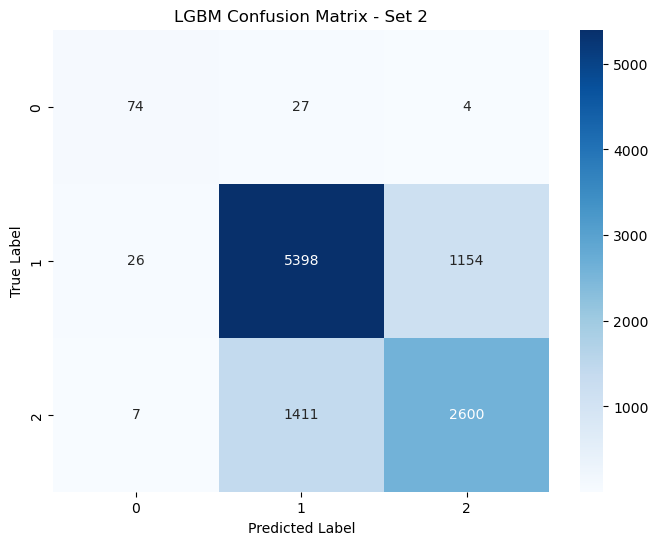


Model Performance Comparison:
           DecisionTree_Set1  DecisionTree_Set2  XGBoost_Set1  XGBoost_Set2  \
Accuracy               0.656              0.691         0.685         0.749   
Precision              0.761              0.759         0.678         0.747   
Recall                 0.656              0.691         0.685         0.749   
F1                     0.558              0.634         0.673         0.747   
ROC AUC                0.643              0.700         0.657         0.887   

           LGBM_Set1  LGBM_Set2  
Accuracy       0.690      0.754  
Precision      0.684      0.752  
Recall         0.690      0.754  
F1             0.672      0.753  
ROC AUC        0.656      0.890  


In [27]:
# Initialize models
models = {
    'DecisionTree': dt_model,
    'XGBoost': xgb_model,
    'LGBM': lgbm_model
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Set 1
    results[f"{name}_Set1"] = evaluate_and_plot(
        model, X1_train_processed, X1_test_processed,
        y_train, y_test, name, 1
    )

    # Set 2
    results[f"{name}_Set2"] = evaluate_and_plot(
        model, X2_train_processed, X2_test_processed,
        y_train, y_test, name, 2
    )

# Display results
results_df = pd.DataFrame(results).round(3)
print("\nModel Performance Comparison:")
print(results_df)

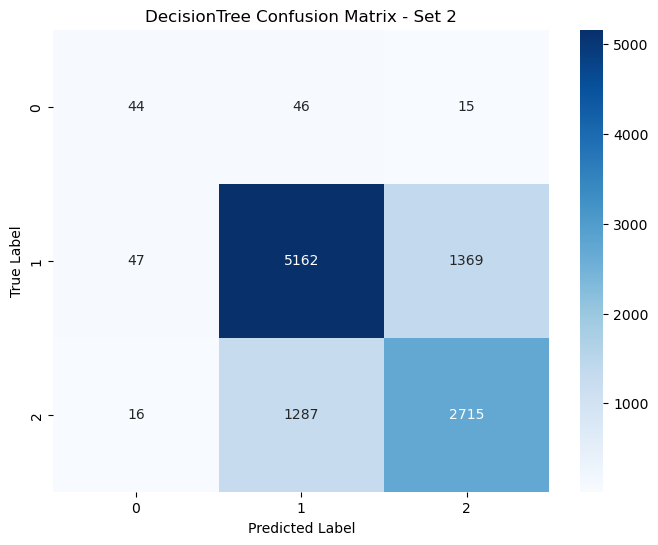

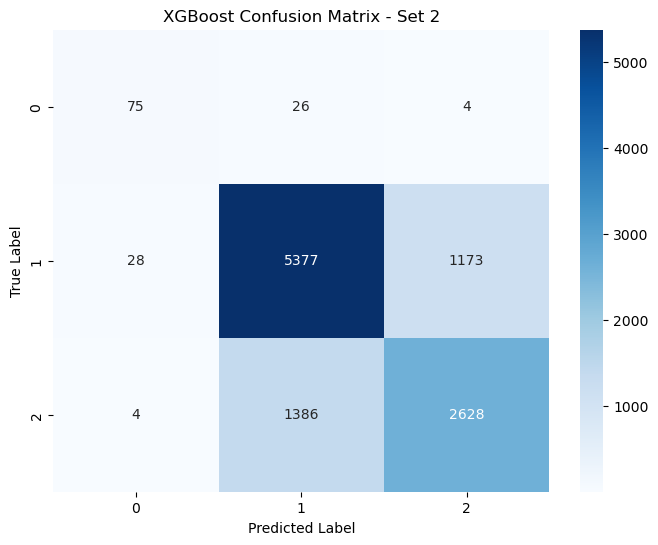

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 42802, number of used features: 27
[LightGBM] [Info] Start training from score -4.619335
[LightGBM] [Info] Start training from score -0.485458
[LightGBM] [Info] Start training from score -0.981562
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 42802, number of used features: 27
[LightGBM] [Info] Start training from score -4.619335
[LightGBM] [Info] Start training from score -0.485458
[LightGBM] [Info] Start training from score -0.981562


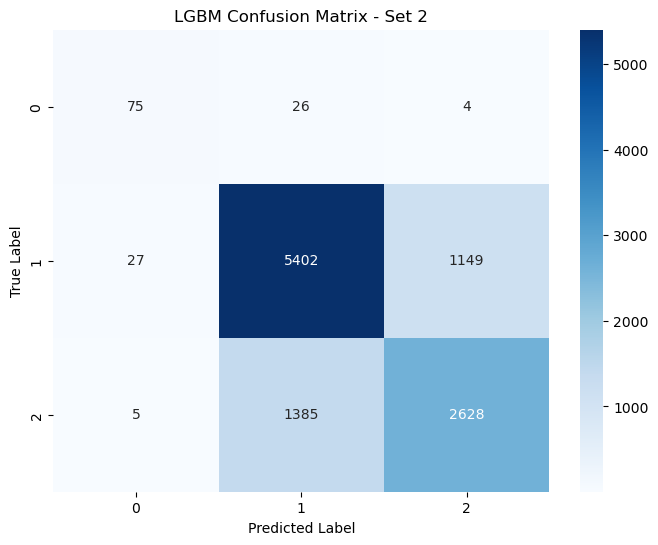


Model Performance Comparison:
           DecisionTree_Set2  XGBoost_Set2  LGBM_Set2
Accuracy               0.740         0.755      0.757
Precision              0.741         0.753      0.755
Recall                 0.740         0.755      0.757
F1                     0.741         0.754      0.756
ROC AUC                0.812         0.891      0.889


In [28]:
models = {
    'DecisionTree': dt_model,
    'XGBoost': xgb_model,
    'LGBM': lgbm_model
}

# Hyperparameter grids for Random Search
param_grids = {
    'DecisionTree': {
        'max_depth': [7, 10, 13, 17],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7]
    },
    'LGBM': {
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 200, 300],
        'num_leaves': [31, 50, 100]
    }
}

# Train and evaluate models
results = {}
from sklearn.model_selection import RandomizedSearchCV

for name, model in models.items():
    # Perform Random Search to find the best parameters
    random_search = RandomizedSearchCV(model, param_grids[name], n_iter=10, scoring='accuracy', cv=3, random_state=42, n_jobs=-1)
    # Fit on the second training set (Set 2)
    random_search.fit(X2_train_processed, y_train)
    best_model = random_search.best_estimator_
    results[f"{name}_Set2"] = evaluate_and_plot(
        best_model, X2_train_processed, X2_test_processed,
        y_train, y_test, name, 2
    )

# Display results
results_df = pd.DataFrame(results).round(3)
print("\nModel Performance Comparison:")
print(results_df)